# Deep Learning

## Cat & Dog Classification in Tensorflow

#### Author: Siddhartha Vale
#### Dataset: SchubertSlySchubert

## Code and Library Importing

In [1]:
import cv2 
import numpy as np 
from keras.models import Model, Sequential, load_model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os 
from random import shuffle 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
from PIL import Image  
from PIL import ImageEnhance 
import tflearn  
from tflearn.layers.conv import conv_2d, max_pool_2d  
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

Using TensorFlow backend.


## Image Pre-Processing for example

**Example of Dog Photo**
- Image credit of https://merchdope.com/small-dog-breeds/

(<matplotlib.axes._subplots.AxesSubplot at 0x1c3094b7b8>,
 <matplotlib.image.AxesImage at 0x1c38b7ee48>)

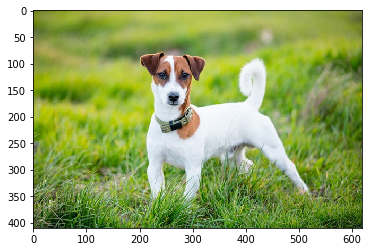

In [2]:
dog = Image.open('dog.jpg')  
plt.subplot(),plt.imshow(dog)

**(1) Brightness enhancing**

(<matplotlib.axes._subplots.AxesSubplot at 0x1c38f79400>,
 <matplotlib.image.AxesImage at 0x1c38f969b0>)

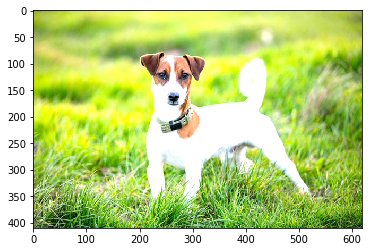

In [3]:
#Brightness enhancing
enhance_bright = ImageEnhance.Brightness(dog)  
brightness = 1.35  
image_brighten = enhance_bright.enhance(brightness)  
plt.subplot(),plt.imshow(image_brighten)

**(2) Saturation enhancing**

(<matplotlib.axes._subplots.AxesSubplot at 0x1c3905f668>,
 <matplotlib.image.AxesImage at 0x1c393bbeb8>)

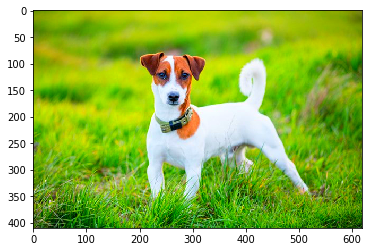

In [4]:
#Saturation enhancing  
enhance_color = ImageEnhance.Color(dog)  
color = 2.0  
image_colored = enhance_color.enhance(color)  
plt.subplot(),plt.imshow(image_colored)

**(3) Contrast enhancing**

(<matplotlib.axes._subplots.AxesSubplot at 0x1c39462f98>,
 <matplotlib.image.AxesImage at 0x1c38cf7080>)

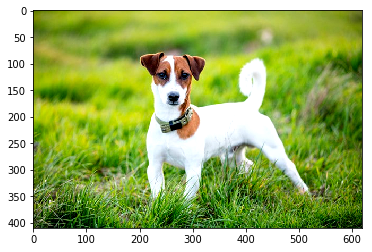

In [5]:
#Contrast enhancing
enh_con = ImageEnhance.Contrast(dog)  
contrast = 1.3  
image_contrasted = enh_con.enhance(contrast)  
plt.subplot(),plt.imshow(image_contrasted)

**(4) Convolution and maxpooling**

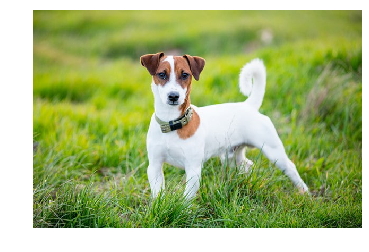

(410, 620, 3)

In [6]:
# Choose and show one of the image in the dataset.
dog = cv2.imread('dog.jpg')
img = mpimg.imread('dog.jpg')
plt.imshow(img) # show image
plt.axis('off') # remove axis
plt.show()
dog.shape

### Build a four-layer convolution and maxpooling in keras.
#### Filter shape is (3,3) and maxpooling shape is (2,2)

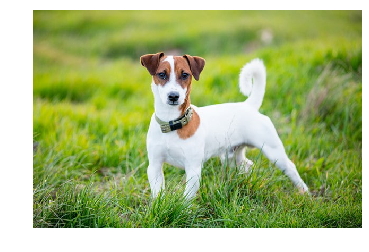

In [7]:
# Show the image after convolution and maxpooling.
picture = mpimg.imread('dog.jpg')
plt.imshow(img) 
plt.axis('off') 
plt.show()

## Applying pseudocolor schemes to image plots

In [8]:
lum_img = img[:,:,0]

(-0.5, 619.5, 409.5, -0.5)

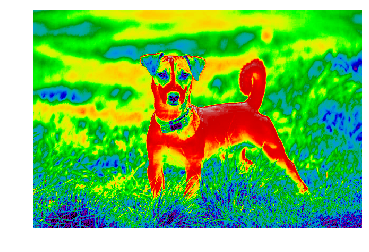

In [9]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')
plt.axis('off')

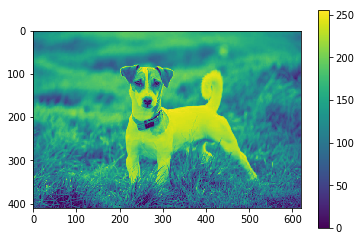

In [10]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

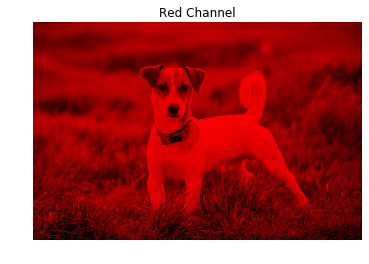

In [11]:
from copy import deepcopy
import skimage.io as io

puppy = io.imread('dog.jpg')

red_channel = deepcopy(puppy)
red_channel[:,:,1]=0
red_channel[:,:,2]=0

plt.imshow(red_channel)
plt.title('Red Channel')
plt.axis('off')
plt.show()

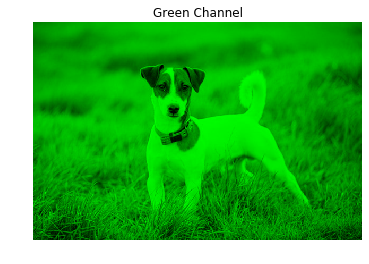

In [12]:
green_channel = deepcopy(puppy)
green_channel[:,:,0]=0
green_channel[:,:,2]=0

plt.imshow(green_channel)
plt.title('Green Channel')
plt.axis('off')
plt.show()

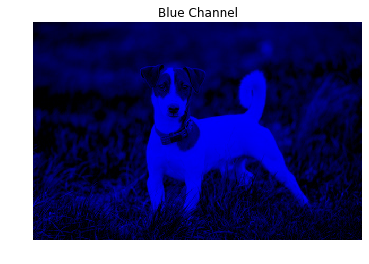

In [13]:
blue_channel = deepcopy(puppy)
blue_channel[:,:,0]=0
blue_channel[:,:,1]=0

plt.imshow(blue_channel, cmap='Greys')
plt.title('Blue Channel')
plt.axis('off')
plt.show()

## Edge Detection using Roberts, Sobel, Scharr

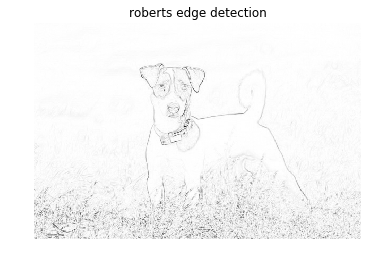

In [14]:
import skimage.io as io
import skimage.filters as sk_filters
image = io.imread('dog.jpg', as_gray=True)

result_1 = sk_filters.roberts(image)
plt.imshow(result_1, cmap='Greys')
plt.title('roberts edge detection')
plt.axis('off')
plt.show()

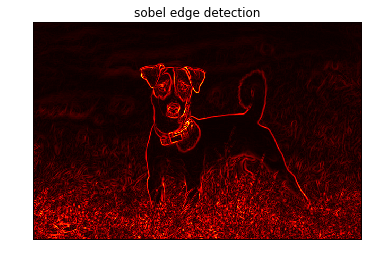

In [15]:
result_2 = sk_filters.sobel(image)
plt.imshow(result_2, cmap='hot')
plt.title('sobel edge detection')
plt.axis('off')
plt.show()

In [16]:
# Use four times convolution and maxpooling layer.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense, Concatenate, add
from scipy import ndimage
model = Sequential()

# Add a convolution layer，filter=3，conv core size is（3,3）
# Add a pooling layer,size is（3,3）
# Add activation function 'ReLu'

#Layer 1
model.add(Conv2D(3,3,3,input_shape= dog.shape,name='conv_1'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Activation('relu'))

#Layer 2
model.add(Conv2D(3,3,3,input_shape= dog.shape,name='conv_2'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

#Layer 3
model.add(Conv2D(3,3,3,input_shape= dog.shape,name='conv_3'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

#Layer 4
model.add(Conv2D(3,3,3,input_shape= dog.shape,name='conv_4'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(410, 620,..., name="conv_1")`
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(410, 620,..., name="conv_2")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(410, 620,..., name="conv_3")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(410, 620,..., name="conv_4")`


In [17]:
dog_batch = np.expand_dims(dog,axis=0)

## Using tflearn to do image classification

### Read the image from local address, set the image size as 50*50 and learning rate = 0.003

In [18]:
train_dir = 'training_set'         # Load the training set image.
test_dir = 'test_set'              # Load the test set image.
img_size = 50                       # Design the image size as 50*50.
learning_rate = 1e-3                # Set the learning rate as 0.003.

### Define a function to split the image's label to get image's characteristics: cat or dog.

In [19]:
# Split the label and get cat and dog.
def label_img(img):
    word_label = img.split('.')[-3]        # Split the image's label. Get the text before "." and after "."
    if word_label == 'cat': return [1,0]   # The text before "." is image's serial number, after "." is animal's name. 
    elif word_label == 'dog': return [0,1] # If it's a cat, return[1,0], if it's a dog, return [0,1].

### Process training data

#### Define a function to process the training set. Create a list to save processed data, then remove some trash image from dataset. Make all images to gray scale and resize into the same size. Use the function which defined above to split the image's label. After that, form a array like (image, label), then shuffle them and save into the list which created at the begining.

In [20]:
def create_train_data():                                        # Define a function to create training data.
    training_data = []                                          # Create a list to save training data.
    for img in tqdm(os.listdir(train_dir)):                     # Read each image from the training file.
        if (not img.endswith('.jpg')):                          # Remove the trash file which is not image.
            continue
        label = label_img(img)                                  # Read image's label.           
        path = os.path.join(train_dir, img)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)            # Use CV2 to do gray scaling for each image.
        img = cv2.resize(img, (img_size, img_size) )            # Make all images in a same size: 50*50, which as already defined above.
        training_data.append([np.array(img), np.array(label)])  # Put gray scaled image and label in the training data list.
    shuffle(training_data)                                      # Shuffle the training data list.
    return training_data

### Use create_train_data() function to process training data, rename as train_data.

In [21]:
train_data = create_train_data()      # Using create_train_data() function which defined above to implement train_data.

100%|██████████| 2/2 [00:00<00:00, 4493.09it/s]


### Process test data
#### Use the same method to create funtion processing test data.

In [22]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(test_dir)):
        if (not img.endswith('.jpg')):
            continue
        path = os.path.join(test_dir,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    return testing_data

In [23]:
import tflearn  # Import TFlearn library.
from tflearn.layers.conv import conv_2d, max_pool_2d  # 2DCNN and max pooling
from tflearn.layers.core import input_data, dropout, fully_connected # input layer，dropout，fully connected feedforward network
from tflearn.layers.estimator import regression # cross entropy layer

### Reset the graph in order to run couples of times.

In [24]:
import tensorflow as tf
tf.reset_default_graph()

# Part A -  Deep Learning

Create a deep learning model for some data. You cannot use the same data as another student. The TAs will set up a data sign-up sheet. MNIST data is NOT ALLOWED.

- Apply a Deep Learning model to your data. Validate the accuracy on out of sample data.
- The Deep Learning model can be a __CNN__, RNN, Autoencoder, Variational autoencoder (VAE), Restricted Boltzmann machine (RBM), Deep belief network (DBN) or Generative Model. It cannot be a simple multilayer perceptron (MLP).

__Features used in Part A__

- __Activation Function:__ Rectified linear unit (ReLU)
- __Cost Function:__ Cross-entropy
- __Epochs:__ 10
- __Gradient Estimation:__ ADAM
- __Network Achitechture:__ Four Layers
- __Network Initializer:__

## Applying a CNN Model

__Set the input layer__

In [25]:
# Define input layer.
convnet = input_data(shape = [None, img_size, img_size, 1], name = 'input')

__Set a five-layer convolution and maxpooling with filter size (5,5) and filter number : 32, 64, 128, 64, 32__

In [26]:
# Five times convnet and maxpooling
convnet = conv_2d(convnet, 32, 5, activation='relu')    # Set convolution layer, 32 filters with (5,5) shape, activation function as relu.
convnet = max_pool_2d(convnet, 5)                       # Set maxpooling layer with (5,5) shape.

convnet = conv_2d(convnet, 64, 5, activation='relu')    # Set convolution layer, 64 filters with (5,5) shape, activation function as relu.
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')   # Set convolution layer, 128 filters with (5,5) shape, activation function as relu.
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')    # Set convolution layer, 64 filters with (5,5) shape, activation function as relu.
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')    # Set convolution layer, 32 filters with (5,5) shape, activation function as relu.
convnet = max_pool_2d(convnet, 5)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


### Enter the fully-connected layer with 0.5 drop out, crossentropy for loss and adam as optimizer.

In [27]:
# Fully connected layers
convnet = fully_connected(convnet, 1024, activation = 'relu')     # Set fully connected layer, size of input is 1024 (32*32)
convnet = dropout(convnet, 0.5)                                   # Set drop out to prevent overfitting.
# Using cross-entropy for loss, adam as optimizer
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = learning_rate, loss='categorical_crossentropy', name='targets')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Use tensorboard to show the output

In [28]:
# Using tensorboard to visualize
model = tflearn.DNN(convnet, tensorboard_dir='log')  # Use tensorboard to visualize the whole neural network.

### Split the training data and test data

In [29]:
# Get training data and test data
train = train_data[:-500]         # Pick first 500 image from training set for training.
test = train_data[-500:]          # Pick last 500 image from training set for testing.

### Transfer train and test data into array then reshape it, form X_train, X_test, y_train, y_test.

In [30]:
# Put image into X and reshape/ Put labels in y and reshape
X_train = np.array([i[0] for i in train], dtype=np.float64).reshape(-1, img_size, img_size, 1)
y_train = np.array([i[1] for i in train], dtype=np.float64)
X_test = np.array([i[0] for i in test], dtype=np.float64).reshape(-1, img_size, img_size, 1)
y_test = np.array([i[1] for i in test], dtype=np.float64)

### Fit the X and y


In [31]:
# Fit the X and y, show the accuracy.                
results = model.fit({'input': X_train}, {'targets': y_train},         # Fit X and y together.
          n_epoch=50,                                                 # Set the number of epoch.
          validation_set=({'input': X_test}, {'targets': y_test}), 
          snapshot_step=500, 
          show_metric=True, 
          run_id='model' )

---------------------------------
Run id: model
Log directory: log/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 0
Validation samples: 0
--


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tflearn/data_flow.py", line 201, in fill_batch_ids_queue
    ids = self.next_batch_ids()
  File "/anaconda3/lib/python3.6/site-packages/tflearn/data_flow.py", line 215, in next_batch_ids
    batch_start, batch_end = self.batches[self.batch_index]
IndexError: list index out of range



### Use nerual network to classify image

In [32]:
# Show the testing output
fig = plt.figure()
for num,data in enumerate(test[:16]):
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(4, 4, num+1)
    orig = img_data
    data = img_data.reshape(img_size, img_size, 1)
    model_out = model.predict([data])[0]
    if np.argmax(model_out) == 1: 
        label = 'Dog'
    else: 
        label = 'Cat'
    
    y.imshow(orig, cmap='gray')
    plt.title(label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

Due to the problem occuring with TensorFlow, Keras is also being used for better results

## Using Keras

In [33]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [34]:
models = Sequential()
models.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(128, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(32, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
models.add(Flatten())  
models.add(Dense(64))
models.add(Activation('relu'))
models.add(Dropout(0.8))
models.add(Dense(1))
models.add(Activation('sigmoid'))
# COMPILE
models.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Show model structure:

In [35]:
models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
__________

### Use ImageDataGenerator() function to process training and test data:

In [36]:
batch_size = 128

# Augmentation configuration for training data.
train_data_generate = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Rescaling
test_data_generate = ImageDataGenerator(rescale=1./255)

# Batches of augmented training data.
train_generator = train_data_generate.flow_from_directory(
        'training_set',         # Training set address
        target_size=(300, 300),  # Resize all images to 300*300
        batch_size=batch_size,   # Set batch_size = 128
        class_mode='binary')  

# Augmentation configuration for test data.
validation_generator = test_data_generate.flow_from_directory(
        'test_set',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
models.fit_generator(
        train_generator,
        steps_per_epoch=200 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

Epoch 1/10
1/1 [==============================] - 33s 33s/step - loss: 0.6942 - acc: 0.5234 - val_loss: 0.6783 - val_acc: 0.6016
Epoch 2/10
1/1 [==============================] - 28s 28s/step - loss: 0.7132 - acc: 0.4453 - val_loss: 0.6749 - val_acc: 0.6016
Epoch 3/10


# Part B - Activation Function

## Output:
For CNN in keras, we create the same model as tflearn but only get 0.708 accuracy in 50 epochs. Because the low accuracy for the training, it's not meanful to predict.

1. Change the activation function (use at least two). How does it effect the accuracy?
2. How does it effect how quickly the network plateaus?

Various activation functions:
- __Rectified linear unit (ReLU)__ [DONE IN PART A]
- __TanH__

## Applying Tanh Activation Function

In [38]:
models = Sequential()
models.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
models.add(Activation('tanh'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('tanh'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(128, (3, 3)))
models.add(Activation('tanh'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('tanh'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(32, (3, 3)))
models.add(Activation('tanh'))
models.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
models.add(Flatten())  
models.add(Dense(64))
models.add(Activation('tanh'))
models.add(Dropout(0.8))
models.add(Dense(1))
models.add(Activation('sigmoid'))
# COMPILE
models.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
activation_8 (Activation)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       73856     
__________

In [40]:
batch_size = 128

# Augmentation configuration for training data.
train_data_generate = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Rescaling
test_data_generate = ImageDataGenerator(rescale=1./255)

# Batches of augmented training data.
train_generator = train_data_generate.flow_from_directory(
        'training_set',         # Training set address
        target_size=(300, 300),  # Resize all images to 300*300
        batch_size=batch_size,   # Set batch_size = 128
        class_mode='binary')  

# Augmentation configuration for test data.
validation_generator = test_data_generate.flow_from_directory(
        'test_set',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [41]:
models.fit_generator(
        train_generator,
        steps_per_epoch=200 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

Epoch 1/10
1/1 [==============================] - 79s 79s/step - loss: 0.7486 - acc: 0.4531 - val_loss: 0.7546 - val_acc: 0.5391
Epoch 2/10
1/1 [==============================] - 75s 75s/step - loss: 0.7603 - acc: 0.5703 - val_loss: 1.0408 - val_acc: 0.4609
Epoch 3/10
1/1 [==============================] - 74s 74s/step - loss: 1.0555 - acc: 0.4688 - val_loss: 0.7111 - val_acc: 0.5156
Epoch 4/10
1/1 [==============================] - 69s 69s/step - loss: 0.9085 - acc: 0.4766 - val_loss: 0.6858 - val_acc: 0.5156
Epoch 5/10
1/1 [==============================] - 70s 70s/step - loss: 0.8149 - acc: 0.4844 - val_loss: 0.7450 - val_acc: 0.4609
Epoch 6/10
1/1 [==============================] - 69s 69s/step - loss: 0.8208 - acc: 0.5156 - val_loss: 0.7169 - val_acc: 0.4609
Epoch 7/10
1/1 [==============================] - 76s 76s/step - loss: 0.7616 - acc: 0.4766 - val_loss: 0.7041 - val_acc: 0.5391
Epoch 8/10
1/1 [==============================] - 74s 74s/step - loss: 0.8273 - acc: 0.4609 - val

__Relu vs Tanh__

Relu has many times been proven to be the strongest activtion function in most deep learning applications. As seen here, relu does exactly that. Using Relu reduced processing time for each epoch from an average of 78 seconds (TanH) to 25 seconds (Relu). The val_acc was also greater with a best score of 0.5312 versus the 0.5078 attained by TanH. TanH however excelled over Relu in the acc, getting the best value of 0.5942, while Relu could only manage a score of 0.4297.

with the both models both under and overfitting was noticed, the TanH model was found to overfit in the middle getting bizzar loss values, some greater than 1.0.

# Part C - Cost Function
Use at least two

On your Deep Learning model data

1. Change the cost function (use at least two). How does it effect the accuracy?
2. How does it effect how quickly the network plateaus?

Various forms of cost:
- __Quadratic cost (mean-square error)__
- Cross-Entropy
- Hinge
- Kullback–Leibler divergence
- Cosine Proximity
- User defined

In [42]:
import tensorflow as tf

In [62]:
# Cost function(MSE):
mse = tf.reduce_mean(tf.squared_difference(X_train, y_train))

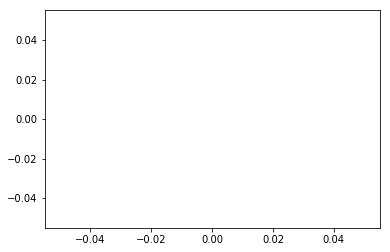

TypeError: unhashable type: 'numpy.ndarray'

In [63]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 5
batch_size = 128

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X_train: batch_x, y_train: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X_train: X_test, y_train: y_test})
print(mse_final)

# Part D - Epochs

In [48]:
models = Sequential()
models.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(128, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(32, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
models.add(Flatten())  
models.add(Dense(64))
models.add(Activation('relu'))
models.add(Dropout(0.8))
models.add(Dense(1))
models.add(Activation('sigmoid'))
# COMPILE
models.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
batch_size = 128

# Augmentation configuration for training data.
train_data_generate = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Rescaling
test_data_generate = ImageDataGenerator(rescale=1./255)

# Batches of augmented training data.
train_generator = train_data_generate.flow_from_directory(
        'training_set',         # Training set address
        target_size=(300, 300),  # Resize all images to 300*300
        batch_size=batch_size,   # Set batch_size = 128
        class_mode='binary')  

# Augmentation configuration for test data.
validation_generator = test_data_generate.flow_from_directory(
        'test_set',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [50]:
models.fit_generator(
        train_generator,
        steps_per_epoch=200 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

Epoch 1/5
1/1 [==============================] - 52s 52s/step - loss: 0.6955 - acc: 0.4688 - val_loss: 0.6934 - val_acc: 0.5078
Epoch 2/5
1/1 [==============================] - 25s 25s/step - loss: 0.6917 - acc: 0.5312 - val_loss: 0.6998 - val_acc: 0.4453
Epoch 3/5
1/1 [==============================] - 22s 22s/step - loss: 0.6972 - acc: 0.4844 - val_loss: 0.7010 - val_acc: 0.4453
Epoch 4/5
1/1 [==============================] - 23s 23s/step - loss: 0.7135 - acc: 0.4922 - val_loss: 0.6974 - val_acc: 0.4453
Epoch 5/5
1/1 [==============================] - 23s 23s/step - loss: 0.7131 - acc: 0.4766 - val_loss: 0.6963 - val_acc: 0.4453


__10 Epochs vs 5 Epochs__

Using the data from Part A, with the same activation function of Relu, the epochs were changed to measure the shift in accruacy. The hypothesis of this test was that a smaller number of epochs would lead to a better accuracy as a high amount of overfitting was noticed with 10 Epochs. With 5 Epochs the best val_acc was 0.5234, acc: 0.5469 and loss: 0.6849, while with 10 Epochs this score was val_acc: 0.6909, acc: 0.5078 and loss: 0.6941.

With certain scores being higher than the others in both cases, it was difficult to come to a conclusion of which epoch number is better, however with 5 Epochs there was no overfitting.

# Part E - Gradient estimation

1. Change the gradient estimation (use at least two). How does it effect the accuracy?
2. How does it effect how quickly the network plateaus?


- __RMSProp__
- ADAM [USED IN PART A]

In [51]:
models = Sequential()
models.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(128, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(32, (3, 3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
models.add(Flatten())  
models.add(Dense(64))
models.add(Activation('relu'))
models.add(Dropout(0.8))
models.add(Dense(1))
models.add(Activation('sigmoid'))
# COMPILE
models.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [52]:
models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
activation_22 (Activation)   (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 128)       73856     
__________

In [53]:
batch_size = 128

# Augmentation configuration for training data.
train_data_generate = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Rescaling
test_data_generate = ImageDataGenerator(rescale=1./255)

# Batches of augmented training data.
train_generator = train_data_generate.flow_from_directory(
        'training_set',         # Training set address
        target_size=(300, 300),  # Resize all images to 300*300
        batch_size=batch_size,   # Set batch_size = 128
        class_mode='binary')  

# Augmentation configuration for test data.
validation_generator = test_data_generate.flow_from_directory(
        'test_set',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [55]:
models.fit_generator(
        train_generator,
        steps_per_epoch=200 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

Epoch 1/5
1/1 [==============================] - 36s 36s/step - loss: 0.7634 - acc: 0.4609 - val_loss: 0.7001 - val_acc: 0.4531
Epoch 2/5
1/1 [==============================] - 29s 29s/step - loss: 0.6957 - acc: 0.4766 - val_loss: 0.6928 - val_acc: 0.5469
Epoch 3/5
1/1 [==============================] - 24s 24s/step - loss: 0.6948 - acc: 0.5000 - val_loss: 0.6896 - val_acc: 0.5469
Epoch 4/5
1/1 [==============================] - 24s 24s/step - loss: 0.6989 - acc: 0.5078 - val_loss: 0.6937 - val_acc: 0.4531
Epoch 5/5
1/1 [==============================] - 24s 24s/step - loss: 0.6953 - acc: 0.4531 - val_loss: 0.6928 - val_acc: 0.5469


__ADAM vs RMSProp__

ADAM has a better gradient estimation tool than RMSProp, and in this scenario we get a better accuracy and lower processing times

# Part F - Network Architecture

1. Change the network architecture (use at least two). How does it effect the accuracy?
2. How does it effect how quickly the network plateaus?

Changes
- Number of Layers
- Size of Layers
- Shape of each Layer


| Changes         | Before          | After               |
| --------------- |:---------------:| -------------------:|
| No. of Layers   | Input + 4       | Input + 5           |
| Size of Layers  | 32-64-128-64-32 | 32-64-128-128-64-32 |
| Shape of Layer  | (3, 3)          | (5, 5)              |

In [56]:
models = Sequential()
models.add(Conv2D(32, (5, 5), input_shape=(350, 350, 3))) 
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (5, 5)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(128, (5, 5)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(128, (5, 5)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (5, 5)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(32, (5, 5)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
models.add(Flatten())  
models.add(Dense(64))
models.add(Activation('relu'))
models.add(Dropout(0.8))
models.add(Dense(1))
models.add(Activation('sigmoid'))
# COMPILE
models.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [57]:
models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 346, 346, 32)      2432      
_________________________________________________________________
activation_28 (Activation)   (None, 346, 346, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 173, 173, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 169, 169, 64)      51264     
_________________________________________________________________
activation_29 (Activation)   (None, 169, 169, 64)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 80, 80, 128)       204928    
__________

In [58]:
batch_size = 128

# Augmentation configuration for training data.
train_data_generate = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Rescaling
test_data_generate = ImageDataGenerator(rescale=1./255)

# Batches of augmented training data.
train_generator = train_data_generate.flow_from_directory(
        'training_set',         # Training set address
        target_size=(350, 350),  # Resize all images to 300*300
        batch_size=batch_size,   # Set batch_size = 200
        class_mode='binary')  

# Augmentation configuration for test data.
validation_generator = test_data_generate.flow_from_directory(
        'test_set',
        target_size=(350, 350),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [60]:
models.fit_generator(
        train_generator,
        steps_per_epoch=200 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

Epoch 1/5
1/1 [==============================] - 95s 95s/step - loss: 2.2569 - acc: 0.4922 - val_loss: 0.6926 - val_acc: 0.5391
Epoch 2/5
1/1 [==============================] - 69s 69s/step - loss: 0.6943 - acc: 0.4922 - val_loss: 0.6933 - val_acc: 0.4609
Epoch 3/5
1/1 [==============================] - 65s 65s/step - loss: 0.6946 - acc: 0.4688 - val_loss: 0.6928 - val_acc: 0.5469
Epoch 4/5
1/1 [==============================] - 64s 64s/step - loss: 0.6916 - acc: 0.6172 - val_loss: 0.6930 - val_acc: 0.5391
Epoch 5/5
1/1 [==============================] - 64s 64s/step - loss: 0.6891 - acc: 0.5078 - val_loss: 0.6926 - val_acc: 0.5469


__Layers, Size and Shape__

One of the most important and best ways to improve a Deep Learning model is to improve upon its architechure. However increaseing its no. of layers, shape and size are not always the best things to do. Here we increse the number of layers by one, introducing a layer with 128 nodes to increase the detection of certain cat & dog attributes and grow the shape of the CNN network from 3, 3 to 5, 5

This change is not very good as it only increases the amount of loss, reducing both the acc and val_acc

# License

Copyright __2019 Siddhartha Vale__

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.